In [39]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [40]:
import numpy
import pandas

In [41]:
import pandas as pd
rand_seed = 42

enzyme_gene = pd.read_csv("enzyme_gene.csv", index_col=0)
enzyme_gene

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
enzyme_gene.head(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0


In [43]:
enzyme_gene.shape

(5238, 18)

In [44]:
# get all feature names
features = enzyme_gene.columns[1:]
features

Index(['Func_likelihood', 'Fam_size', 'Max_id_paralog', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Dup_tandem', 'Singleton',
       'Max_PCC_GM_abiotic', 'Max_PCC_SM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_SM_hormone',
       'Expr_med_dev', 'Expr_max_dev', 'Expr_breadth_dev'],
      dtype='object')

In [45]:
enzyme_gene.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G06850,GM,0.965,33.0,77.35,0.0,0.0,0.0,0.0,0.0,0.898,0.907,0.909,0.894,0.861,0.750,3514.243481,23701.323470,58.0
AT3G43600,unknown,0.935,10.0,96.43,0.0,0.0,0.0,0.0,0.0,0.839,0.784,0.846,0.777,0.876,0.814,86.894278,736.796132,47.0
AT5G17200,GM,0.125,67.0,44.39,1.0,1.0,0.0,0.0,0.0,0.678,0.687,0.713,0.637,0.800,0.662,6.206636,89.123658,2.0
AT5G20500,GM,NaN,27.0,56.45,0.0,0.0,0.0,0.0,1.0,0.737,0.532,0.894,0.717,0.915,0.854,1535.834682,2736.154727,64.0


In [46]:
enzyme_gene.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,3550.000000,4152.000000,3899.000000,4769.000000,4769.000000,4501.000000,4512.000000,4240.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4150.000000,4150.000000,4150.000000
mean,0.804897,29.770472,66.566127,0.279094,0.122667,0.049767,0.270612,0.051651,0.789531,0.725130,0.848149,0.793080,0.815422,0.746845,428.028998,2191.368616,44.368675
std,0.254692,41.524700,18.041234,0.448601,0.328089,0.217487,0.444325,0.221347,0.090319,0.106227,0.079397,0.099534,0.082482,0.104096,1042.343895,3327.095677,24.428359
min,0.000000,1.000000,19.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.322000,0.531000,0.445000,0.486000,0.412000,3.233606,5.763663,0.000000
25%,0.690750,4.000000,54.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731000,0.655000,0.800000,0.728000,0.762000,0.673000,14.464360,326.100708,17.000000
50%,0.940000,11.000000,70.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.737000,0.857000,0.804000,0.822000,0.748000,117.897502,982.311288,60.000000
75%,0.990000,34.000000,80.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.857000,0.806000,0.908000,0.871000,0.878000,0.824250,400.282721,2564.031166,64.000000
max,1.000000,293.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.983000,0.987000,0.978000,20115.064720,30288.301360,64.000000


In [47]:
enzyme_gene.nunique()

Label                    3
Func_likelihood        538
Fam_size                56
Max_id_paralog        2525
WGD_alpha                2
WGD_beta_gamma           2
Dup_recent               2
Dup_tandem               2
Singleton                2
Max_PCC_GM_abiotic     429
Max_PCC_SM_abiotic     503
Max_PCC_GM_biotic      383
Max_PCC_SM_biotic      450
Max_PCC_GM_hormone     397
Max_PCC_SM_hormone     487
Expr_med_dev          4150
Expr_max_dev          4149
Expr_breadth_dev        65
dtype: int64

In [48]:
enzyme_gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, AT2G20690 to nan
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               4913 non-null   object 
 1   Func_likelihood     3550 non-null   float64
 2   Fam_size            4152 non-null   float64
 3   Max_id_paralog      3899 non-null   float64
 4   WGD_alpha           4769 non-null   float64
 5   WGD_beta_gamma      4769 non-null   float64
 6   Dup_recent          4501 non-null   float64
 7   Dup_tandem          4512 non-null   float64
 8   Singleton           4240 non-null   float64
 9   Max_PCC_GM_abiotic  4152 non-null   float64
 10  Max_PCC_SM_abiotic  4152 non-null   float64
 11  Max_PCC_GM_biotic   4152 non-null   float64
 12  Max_PCC_SM_biotic   4152 non-null   float64
 13  Max_PCC_GM_hormone  4152 non-null   float64
 14  Max_PCC_SM_hormone  4152 non-null   float64
 15  Expr_med_dev        4150 non-null   float64
 16  Expr

In [49]:
print(enzyme_gene["Label"].value_counts())

Label
unknown    2291
GM         2212
SM          410
Name: count, dtype: int64


In [50]:
enzyme_gene.isnull().sum()

Label                  325
Func_likelihood       1688
Fam_size              1086
Max_id_paralog        1339
WGD_alpha              469
WGD_beta_gamma         469
Dup_recent             737
Dup_tandem             726
Singleton              998
Max_PCC_GM_abiotic    1086
Max_PCC_SM_abiotic    1086
Max_PCC_GM_biotic     1086
Max_PCC_SM_biotic     1086
Max_PCC_GM_hormone    1086
Max_PCC_SM_hormone    1086
Expr_med_dev          1088
Expr_max_dev          1088
Expr_breadth_dev      1088
dtype: int64

In [51]:
import matplotlib
import seaborn

In [52]:
# The 1st ":" is to get all rows. The "1:" part is to get the 2nd column and on.
feature_values = enzyme_gene.iloc[:, 1:]
feature_values

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,
AT2G20690,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


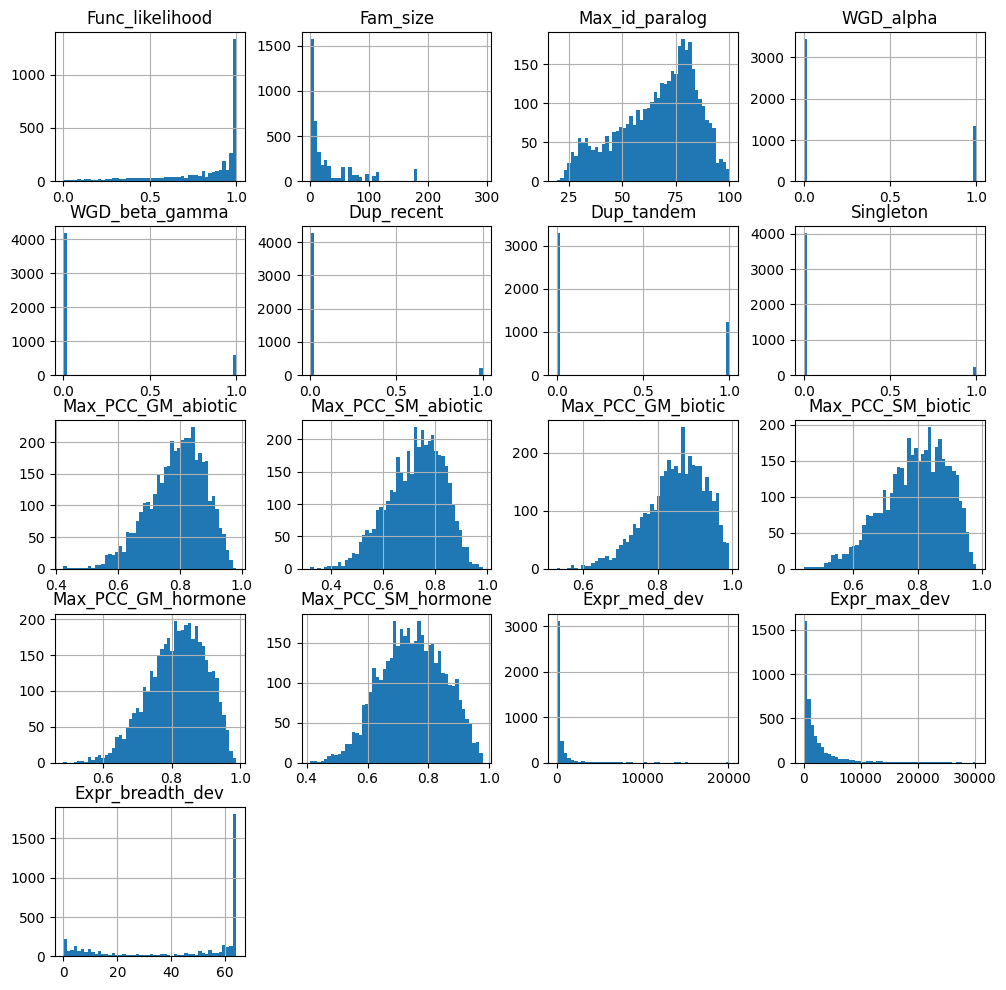

In [53]:
# Draw histogram
hist = feature_values.hist(figsize=(12,12), bins=50)

In [54]:
# Calculate Spearman's rank correlations for all feature pairs
corr = feature_values.corr(method ='spearman')
corr

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Func_likelihood,1.000000,-0.425232,-0.044509,0.048101,-0.031368,-0.159467,-0.365871,0.145597,0.270916,0.046910,0.133880,0.010729,0.252289,0.087491,0.809380,0.486005,0.803178
Fam_size,-0.425232,1.000000,0.126797,-0.056985,0.013941,0.115253,0.344059,-0.206112,-0.158623,0.013337,-0.052723,0.028097,-0.096479,0.003539,-0.381190,-0.105345,-0.439901
Max_id_paralog,-0.044509,0.126797,1.000000,-0.028074,-0.000748,0.090542,0.231457,-0.274425,-0.026789,-0.020144,-0.027380,-0.002215,0.031349,0.060209,-0.013421,0.076196,-0.051526
WGD_alpha,0.048101,-0.056985,-0.028074,1.000000,0.068015,0.002366,-0.033998,0.006703,0.022448,-0.004108,0.002457,-0.011307,0.011289,0.000698,0.039406,-0.011395,0.049960
WGD_beta_gamma,-0.031368,0.013941,-0.000748,0.068015,1.000000,0.014659,-0.004633,-0.024479,-0.001354,-0.004194,0.014195,0.004963,0.009639,-0.004969,-0.020867,-0.006981,-0.028465
Dup_recent,-0.159467,0.115253,0.090542,0.002366,0.014659,1.000000,0.189511,-0.045019,-0.046663,-0.021227,-0.014142,0.008451,-0.088582,-0.061154,-0.105114,-0.102642,-0.118330
Dup_tandem,-0.365871,0.344059,0.231457,-0.033998,-0.004633,0.189511,1.000000,-0.141858,-0.072686,0.054327,0.009010,0.080658,-0.058476,0.042842,-0.294494,-0.136162,-0.330194
Singleton,0.145597,-0.206112,-0.274425,0.006703,-0.024479,-0.045019,-0.141858,1.000000,0.056676,-0.014765,0.032353,-0.006439,0.006871,-0.052028,0.108895,-0.041977,0.159309
Max_PCC_GM_abiotic,0.270916,-0.158623,-0.026789,0.022448,-0.001354,-0.046663,-0.072686,0.056676,1.000000,0.702527,0.327993,0.275294,0.166645,0.054970,0.312563,0.215558,0.238961
Max_PCC_SM_abiotic,0.046910,0.013337,-0.020144,-0.004108,-0.004194,-0.021227,0.054327,-0.014765,0.702527,1.000000,0.272101,0.311541,0.076733,0.103616,0.094686,0.151211,0.025415


<Axes: >

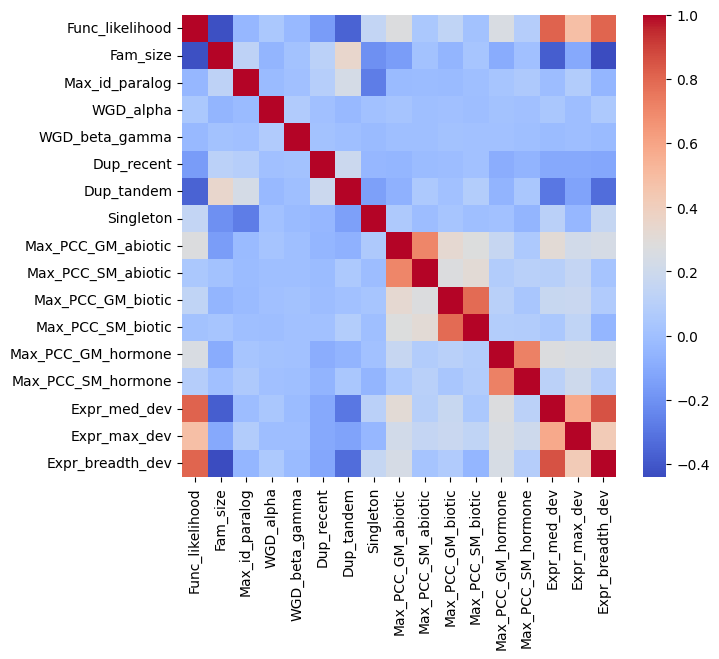

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(corr, cmap="coolwarm")

In [56]:
labels = ['GM', 'SM']
labels

['GM', 'SM']

In [57]:
label_column = enzyme_gene['Label']
label_column

Gene
AT2G20690     GM
AT5G10920     GM
AT4G02580     GM
AT5G52840     GM
AT4G02620     GM
            ... 
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
Name: Label, Length: 5238, dtype: object

In [58]:
labels              = ['GM', 'SM']
label_column        = enzyme_gene['Label']
label_column_filter = label_column.isin(labels)

# enzyme_gene dataframe with only GM and SM
enzyme_gene_fil = enzyme_gene[label_column_filter]

# Count the occurence of unique values
enzyme_gene_fil['Label'].value_counts()

Label
GM    2212
SM     410
Name: count, dtype: int64

In [59]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,SM,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,SM,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,SM,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [60]:
# import the proprecessing functions
from sklearn import preprocessing

# Create a LabelEncoder object: this is simply a software tool that turn
# (encode) texts into 0 or 1 (labels) in this case.
le = preprocessing.LabelEncoder()

# Send the Label column of enzyme_gene_fil dataframe to the LabelEncoder so
# it can fit (i.e., learn) how to encode the labels.
le.fit(enzyme_gene_fil.Label)

# Now, used the fitted (learned) encoder to transform texts to labels
enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)

<ipython-input-60-53b6e9b3aa14>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)


In [61]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,0,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,0,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,1,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,1,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,1,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [62]:
enzyme_gene_fil['Label'].value_counts()

Label
0    2212
1     410
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
                enzyme_gene_fil,                # The data to split
                test_size=0.2,                  # Proportion data for testing
                stratify=enzyme_gene_fil.Label, # Make sure proportions of 0/1
                                                # labels are similar between
                                                # training and testing sets
                random_state=rand_seed)

In [64]:
# Print out proportions of different labels in the training data
print(train['Label'].value_counts()/train.shape[0])

Label
0    0.843586
1    0.156414
Name: count, dtype: float64


In [65]:
# Print out proportions of different labels in the testing data
print(test['Label'].value_counts()/test.shape[0])

Label
0    0.84381
1    0.15619
Name: count, dtype: float64


In [66]:
enzyme_gene_fil.shape

(2622, 18)

In [67]:
# ask which values are null.
row_na     = enzyme_gene_fil.isnull()
row_na

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
AT5G10920,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02580,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT5G52840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02620,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT2G29460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT1G59700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = train.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT1G44575     1
AT1G16350     2
AT4G00500     1
AT4G26850     3
ATCG00670    13
dtype: int64

In [71]:
num_feat     = train.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
train_keep = train[rows_to_keep]             # training data with rows to keep
train['Label'].value_counts()

Label
0    1769
1     328
Name: count, dtype: int64

In [72]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(train_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
train_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
train_keep_imp = pd.DataFrame(train_keep_imp, columns=train.columns)
train_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
21,0.0,0.420,9.0,81.46,0.0,1.0,0.0,1.0,0.0,0.767,0.738,0.870,0.775,0.798,0.777,6.148137,104.605451,3.0
331,1.0,0.592,26.0,81.25,0.0,0.0,0.0,1.0,0.0,0.780,0.801,0.951,0.943,0.816,0.798,6.773656,80.786574,6.0
1371,0.0,0.990,6.0,62.33,0.0,0.0,0.0,0.0,0.0,0.829,0.780,0.825,0.645,0.787,0.756,842.714552,1404.844038,63.0
1229,0.0,0.435,6.0,45.35,1.0,1.0,0.0,0.0,0.0,0.883,0.843,0.931,0.898,0.771,0.781,5.381987,307.645831,3.0


In [73]:
row_na_num = test.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT3G28180    0
AT2G12190    0
AT2G33040    0
AT4G29680    0
AT1G36160    0
dtype: int64

In [75]:
num_feat     = test.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
test_keep = test[rows_to_keep]             # training data with rows to keep
test['Label'].value_counts()

Label
0    443
1     82
Name: count, dtype: int64

In [76]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(test_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
test_keep_imp = imputer.transform(test_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
test_keep_imp = pd.DataFrame(test_keep_imp, columns=test.columns)
test_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
249,1.0,1.000,82.0,57.05,0.0,0.0,0.0,0.0,0.0,0.881,0.778,0.882,0.786,0.766,0.683,8638.863459,23698.460310,64.0
383,0.0,0.709,115.0,51.87,1.0,0.0,0.0,0.0,0.0,0.844,0.887,0.864,0.869,0.786,0.765,19.160520,1241.435998,27.0
44,0.0,0.880,9.0,71.21,1.0,0.0,0.0,0.0,0.0,0.909,0.895,0.979,0.972,0.932,0.925,13.002096,3323.394888,26.0
267,0.0,0.990,31.0,53.35,0.0,0.0,0.0,0.0,0.0,0.804,0.825,0.806,0.837,0.774,0.658,309.294821,927.778842,64.0


In [77]:
train_keep_imp.head()

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
0,0.0,0.960,1.0,80.896,0.0,1.0,0.0,0.0,0.0,0.913,0.825,0.987,0.936,0.815,0.634,8672.032761,14827.084360,62.0
1,0.0,1.000,2.0,84.490,0.2,0.0,0.0,0.0,0.0,0.885,0.701,0.903,0.800,0.823,0.685,453.763209,1073.630540,63.0
2,0.0,0.878,3.0,66.250,0.0,1.0,0.0,0.0,0.0,0.744,0.741,0.800,0.722,0.663,0.502,109.881133,350.012261,63.0
3,0.0,1.000,2.0,76.850,0.0,0.0,0.0,0.2,0.0,0.834,0.823,0.761,0.694,0.841,0.710,1527.830268,5499.834040,63.0
4,1.0,0.150,17.0,97.860,0.0,0.0,1.0,1.0,0.0,0.863,0.981,0.812,0.967,0.776,0.661,53.147587,1074.500940,53.0


In [78]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_train = train_keep_imp.iloc[:,1:]

# training labels
y_train = train_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_train.columns

# summarize class distribution
counter = Counter(y_train)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("After :", counter)

Before: Counter({0.0: 1529, 1.0: 272})
After : Counter({0.0: 611, 1.0: 611})


In [79]:
X_train_bal.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.766944,43.322739,67.555589,0.328046,0.129350,0.036149,0.315612,0.039498,0.788338,0.735260,0.849515,0.797178,0.816966,0.754506,385.232055,2107.399799,42.562821
std,0.259054,53.913089,16.279931,0.437343,0.310267,0.170339,0.434608,0.180782,0.084554,0.104451,0.071716,0.090176,0.078046,0.103335,924.465438,3231.501299,24.159868
min,0.009000,1.000000,21.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434000,0.354000,0.584000,0.470000,0.544000,0.421000,3.296482,6.667993,0.000000
25%,0.580000,5.000000,57.672500,0.000000,0.000000,0.000000,0.000000,0.000000,0.735015,0.668732,0.805768,0.736315,0.765512,0.685000,14.008623,347.264665,16.000000
50%,0.886899,16.000000,70.428303,0.000000,0.000000,0.000000,0.000000,0.000000,0.794100,0.749000,0.854374,0.809000,0.819941,0.754000,96.235953,987.147459,56.236113
75%,0.980000,67.000000,79.084040,0.983813,0.000000,0.000000,0.967540,0.000000,0.850000,0.811609,0.902644,0.861646,0.875886,0.831899,378.121290,2429.750656,64.000000
max,1.000000,180.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.981000,0.991000,0.969000,0.977000,0.971000,13968.472470,30288.301360,64.000000


In [80]:
from sklearn.preprocessing import RobustScaler

# initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_train_bal)

# transform the training feature values with the fitted scaler
X_train_scale = scaler.transform(X_train_bal)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,1222.000000,1222.000000,1.222000e+03,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03,1222.000000,1222.000000
mean,-0.299887,0.440689,-1.341666e-01,0.333443,0.129350,0.036149,0.326200,0.039498,-5.011751e-02,-0.096163,-0.050155,-0.094327,-0.026955,0.003446,7.936997e-01,0.537940,-0.284860
std,0.647634,0.869566,7.603344e-01,0.444539,0.310267,0.170339,0.449189,0.180782,7.353484e-01,0.731057,0.740292,0.719504,0.707105,0.703442,2.538954e+00,1.551752,0.503331
min,-2.194747,-0.241935,-2.272994e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-3.131708e+00,-2.764613,-2.790939,-2.704841,-2.500058,-2.266871,-2.552492e-01,-0.470822,-1.171586
25%,-0.767247,-0.177419,-5.957443e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-5.138538e-01,-0.561800,-0.501731,-0.579945,-0.493137,-0.469712,-2.258294e-01,-0.307269,-0.838252
50%,0.000000,0.000000,-3.318472e-16,0.000000,0.000000,0.000000,0.000000,0.000000,4.826868e-16,0.000000,0.000000,0.000000,0.000000,0.000000,1.951564e-17,0.000000,0.000000
75%,0.232753,0.822581,4.042557e-01,1.000000,0.000000,0.000000,1.000000,0.000000,4.861462e-01,0.438200,0.498269,0.420055,0.506863,0.530288,7.741706e-01,0.692731,0.161748
max,0.282753,2.645161,1.381110e+00,1.016453,1.000000,1.000000,1.033549,1.000000,1.634119e+00,1.623773,1.410329,1.276621,1.422971,1.477210,3.809875e+01,14.070277,0.161748


In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_test = test_keep_imp.iloc[:,1:]

# training labels
y_test = test_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_test.columns

# summarize class distribution
counter = Counter(y_test)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_test_bal, y_test = pipeline.fit_resample(X_test, y_test)

# summarize the new class distribution
counter = Counter(y_test)
print("After :", counter)

Before: Counter({0.0: 367, 1.0: 63})
After : Counter({0.0: 146, 1.0: 146})


In [82]:
X_test_bal.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.747775,48.468702,69.217288,0.280832,0.132227,0.055797,0.328562,0.063576,0.777379,0.724376,0.836170,0.786808,0.807587,0.746692,284.864760,2028.741980,39.454306
std,0.279877,54.468733,16.248924,0.410833,0.304064,0.214796,0.438447,0.218657,0.084124,0.103643,0.079290,0.098571,0.081433,0.097553,730.927943,3109.790331,24.738203
min,0.036000,1.000000,26.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545000,0.457000,0.531000,0.471000,0.486000,0.478000,3.443977,5.763663,0.000000
25%,0.599628,8.894130,57.341622,0.000000,0.000000,0.000000,0.000000,0.000000,0.722000,0.659034,0.787750,0.721000,0.755000,0.675500,12.098864,228.994244,12.221584
50%,0.855227,24.000000,74.135384,0.000000,0.000000,0.000000,0.000000,0.000000,0.784679,0.736442,0.842678,0.800000,0.817000,0.738000,82.575238,899.115200,51.101270
75%,0.970000,82.157864,80.860878,0.615575,0.000000,0.000000,0.897298,0.000000,0.838773,0.796518,0.892784,0.863198,0.868000,0.817867,271.901378,2705.563220,63.872645
max,1.000000,180.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.960000,0.961000,0.988000,0.972000,0.961000,0.959000,8638.863459,23764.083630,64.000000


In [83]:
from sklearn.preprocessing import RobustScaler

# initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_test_bal)

# transform the training feature values with the fitted scaler
X_test_scale = scaler.transform(X_test_bal)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
X_test_scale.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,292.000000
mean,-0.290119,0.333981,-0.209109,0.456211,0.132227,0.055797,0.366168,0.063576,-6.251282e-02,-0.087762,-0.061953,-0.092769,-0.083297,0.061053,0.778628,4.561257e-01,-0.225493
std,0.755665,0.743461,0.690878,0.667397,0.304064,0.214796,0.488631,0.218657,7.204071e-01,0.753849,0.754897,0.693195,0.720645,0.685224,2.813398,1.255685e+00,0.478949
min,-2.211902,-0.313934,-2.039409,0.000000,0.000000,0.000000,0.000000,0.000000,-2.052514e+00,-2.032531,-2.967402,-2.313679,-2.929204,-1.826269,-0.304582,-3.607214e-01,-0.989356
25%,-0.690115,-0.206185,-0.714043,0.000000,0.000000,0.000000,0.000000,0.000000,-5.367569e-01,-0.563034,-0.522952,-0.555564,-0.548673,-0.439007,-0.271269,-2.705844e-01,-0.752737
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.753142e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.255141e-17,0.000000
75%,0.309885,0.793815,0.285957,1.000000,0.000000,0.000000,1.000000,0.000000,4.632431e-01,0.436966,0.477048,0.444436,0.451327,0.560993,0.728731,7.294156e-01,0.247263
max,0.390885,2.129294,1.099721,1.624497,1.000000,1.000000,1.114456,1.000000,1.501380e+00,1.633328,1.383576,1.209583,1.274336,1.552328,32.933816,9.232518e+00,0.249728


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a function for running RandomForest
def run_randomforest(X_train, y_train):
    # Below is a Python dictionary specify the hyperparameters to be tested
    #  2x3x4x1 = 24
    param_grid = {'n_estimators': [200, 500],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth' : [3,5,7,9],
                  'criterion' :['entropy']}

    # Initialize a random forest classifier (rfc) with a random seed
    rfc = RandomForestClassifier(random_state=rand_seed)

    # Initialize a grid search object that will search through each of the 24
    # hyperparameter combinations. For each combination, a five fold cross-
    # validation (cv) is done. So totally 24x5 = 120 random forest classifiers
    # will be build.
    rfc_gs = GridSearchCV(
                rfc,
                param_grid,
                cv=5,              # cross validation folds
                verbose=2,         #
                scoring='roc_auc', # find model with the best ROC-AUC
                n_jobs=8)          # number of concurrent jobs, you need to
                                   # adjust this based on the number of CPU cores
                                   # available on your machine.

    # Pass the training feaure and label data to the grid search object and
    # start fitting (training) models
    rfc_gs.fit(X_train, y_train)

    # Return the fitted grid search object
    return rfc_gs

In [88]:
rfc_gs = run_randomforest(X_train_scale, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [94]:
# The best model (also called estimator)
best_model = rfc_gs.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500,
                       random_state=42)

In [95]:
# The best ROC-AUC score averged across CV folds for the best model
print(rfc_gs.best_score_)

0.9273895670997317


In [96]:
import pickle

filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [98]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# COMMENT: What does this do?
#
param_grid = {'C': [1, 10, 1e2],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# COMMENT: What does this do?
#
svc    = SVC()

# COMMENT: What does this do?
#
svc_gs = GridSearchCV(svc, param_grid, cv=5, verbose=2, scoring='roc_auc',
                      n_jobs=8)

# COMMENT: What does this do?
#
svc_gs.fit(X_train_scale, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': [1, 10, 100.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=2)

In [99]:
# COMMENT: What does this do?
#
filename = "model_svc_gridsearch.save"
pickle.dump(svc_gs.best_estimator_, open(filename, 'wb'))

# COMMENT: What does these do?
#
print(svc_gs.best_params_)
print(svc_gs.best_score_)

##COMMENT ANSWERS##
#  Set up the hyperparameter combinations: 3x4x2 = 24 runs
#  Intialize a support vector classifier
#  Initiate a grid search object with cross validation
#  Search for the best hyperparameters with training data
#  Save the best model as a file
#  Print out the best parameters and best scores

{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.9076914589355514


In [100]:
from sklearn.inspection import permutation_importance

# Specify the best model (estimator) from our RandomForest run
rfc = rfc_gs.best_estimator_

# Calculate permutation importance of each feature
result = permutation_importance(
    rfc, X_train_scale, y_train, n_repeats=10, random_state=42, n_jobs=8)

# COMMENTS: What can you find in the result?
#
#
result

{'importances_mean': array([3.55973813e-02, 1.91653028e-01, 1.72667758e-02, 6.54664484e-03,
        6.21931260e-03, 7.36497545e-04, 5.45826514e-02, 1.63666121e-04,
        1.17021277e-02, 3.63338789e-02, 1.15384615e-02, 1.06382979e-02,
        9.41080196e-03, 1.84942717e-02, 1.90671031e-02, 3.15875614e-02,
        1.63666121e-02]),
 'importances_std': array([0.00433406, 0.00856554, 0.00152877, 0.00089644, 0.00083454,
        0.00057283, 0.00515028, 0.00032733, 0.00082241, 0.00217128,
        0.00139116, 0.002763  , 0.0012275 , 0.00300005, 0.00175703,
        0.00237739, 0.00367794]),
 'importances': array([[0.03764321, 0.0400982 , 0.03436989, 0.04091653, 0.03109656,
         0.03600655, 0.03027823, 0.0400982 , 0.02782324, 0.03764321],
        [0.20294599, 0.19639935, 0.19230769, 0.17675941, 0.18821604,
         0.18576105, 0.18003273, 0.19230769, 0.20294599, 0.19885434],
        [0.01718494, 0.01636661, 0.01472995, 0.0188216 , 0.01800327,
         0.01800327, 0.01472995, 0.01718494, 0.

In [101]:
# sort the permutation importance based on mean values
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_idx

array([ 1,  6,  9,  0, 15, 14, 13,  2, 16,  8, 10, 11, 12,  3,  4,  5,  7])

In [102]:
# Get the importance values in order of the sorted_idx
importance_values = result.importances[sorted_idx].T

In [103]:
ordered_feature_label = X_train_scale.columns[sorted_idx]
ordered_feature_label

Index(['Fam_size', 'Dup_tandem', 'Max_PCC_SM_abiotic', 'Func_likelihood',
       'Expr_max_dev', 'Expr_med_dev', 'Max_PCC_SM_hormone', 'Max_id_paralog',
       'Expr_breadth_dev', 'Max_PCC_GM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Singleton'],
      dtype='object')

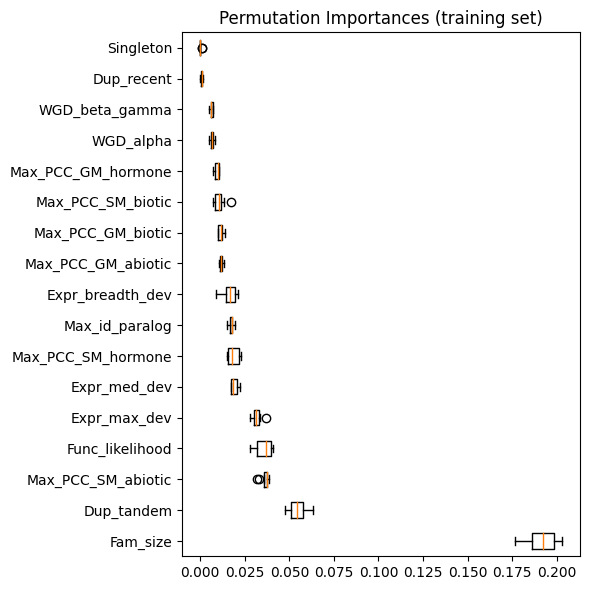

In [104]:
# Plot the permutation importance results
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(importance_values,
           vert=False,
           labels=ordered_feature_label)
ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
plt.show()

In [105]:
# Get top 10 feature names
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_train_top10 = X_train_scale[feat_top10]
X_train_top10.shape

(1222, 10)

In [106]:
# Do the same for testing data
X_test_top10 = X_test_scale[feat_top10]
X_test_top10.shape

(292, 10)

In [108]:
X_test_top10.head(4)

,Fam_size,Dup_tandem,Max_PCC_SM_abiotic,Func_likelihood,Expr_max_dev,Expr_med_dev,Max_PCC_SM_hormone,Max_id_paralog,Expr_breadth_dev,Max_PCC_GM_abiotic
0,-0.163792,0.0,-1.196075,0.010187,-0.264875,-0.286797,-0.779676,-0.396925,-0.853831,-2.052514
1,0.027299,0.0,-0.468722,0.347685,3.483099,0.006578,0.203699,0.131153,0.075482,0.037004
2,1.242088,0.0,-0.126866,-0.662110,-0.007107,-0.061972,-0.892062,-0.715813,-0.079403,-0.493939
3,1.132893,0.0,-0.083225,0.363885,1.457739,7.650155,0.189651,-0.580179,0.191646,0.559384


this code accurecy of modal

In [107]:

rfc_gs_top10 = run_randomforest(X_train_top10, y_train)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


In [110]:
filename = "model_randomforest_gridsearch_top10feat.save"

pickle.dump(rfc_gs_top10.best_estimator_, open(filename, 'wb'))

print accrecy

In [111]:
# Get model score
rfc_gs_top10.best_score_

0.9242773469965221

In [112]:
# Get top 10 feature names
feat_top5 = ordered_feature_label[:5]

# Get training data with only the top 10 features
X_train_top5 = X_train_scale[feat_top10]
X_train_top5.shape

(1222, 10)

In [113]:
# Do the same for testing data
X_test_top5 = X_test_scale[feat_top5]
X_test_top5.shape

(292, 5)

In [114]:
X_test_top10.head(5)

,Fam_size,Dup_tandem,Max_PCC_SM_abiotic,Func_likelihood,Expr_max_dev,Expr_med_dev,Max_PCC_SM_hormone,Max_id_paralog,Expr_breadth_dev,Max_PCC_GM_abiotic
0,-0.163792,0.0,-1.196075,0.010187,-0.264875,-0.286797,-0.779676,-0.396925,-0.853831,-2.052514
1,0.027299,0.0,-0.468722,0.347685,3.483099,0.006578,0.203699,0.131153,0.075482,0.037004
2,1.242088,0.0,-0.126866,-0.662110,-0.007107,-0.061972,-0.892062,-0.715813,-0.079403,-0.493939
3,1.132893,0.0,-0.083225,0.363885,1.457739,7.650155,0.189651,-0.580179,0.191646,0.559384
4,-0.313934,0.0,0.418649,0.390885,-0.273541,0.199522,0.491688,-0.585111,0.249728,0.713529


In [115]:
rfc_gs_top5 = run_randomforest(X_train_top10, y_train)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


In [118]:
filename = "model_randomforest_gridsearch_top10feat.save"

pickle.dump(rfc_gs_top5.best_estimator_, open(filename, 'wb'))

In [117]:
rfc_gs_top5.best_score_

0.9242773469965221

In [119]:
filename2 = "model_randomforest_gridsearch_top10feat.save"

# load model from file
rfc_loaded_top10 = pickle.load(open(filename2, 'rb')) # model using top 10

# predict testing data labels with the model using top 10 features
y_test_pred = rfc_loaded_top10.predict(X_test_top10)

In [120]:
# Take a look at the 1st 40 predictions
print(y_test_pred[:40])

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [121]:
# Also take a look at the 1st 40 TRUE values
print(numpy.array(y_test[:40]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get confusion matrrix
cm_top10 = confusion_matrix(y_test, y_test_pred)

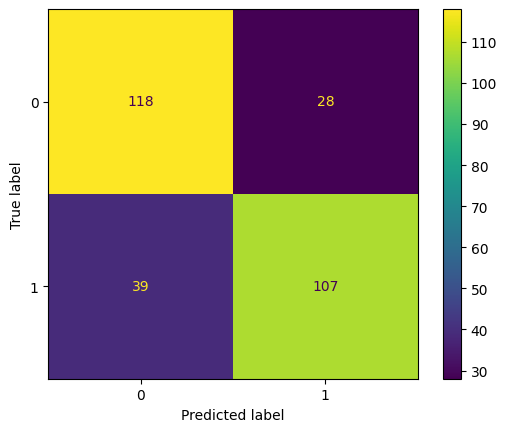

In [123]:
cm_display = ConfusionMatrixDisplay(cm_top10).plot()

In [124]:
from sklearn.metrics import classification_report

# Set class names
targets = ["GM", "SM"]

report = classification_report(y_test, y_test_pred, target_names=targets)
print(report)

              precision    recall  f1-score   support

          GM       0.75      0.81      0.78       146
          SM       0.79      0.73      0.76       146

    accuracy                           0.77       292
   macro avg       0.77      0.77      0.77       292
weighted avg       0.77      0.77      0.77       292

